### ARIMA YAHOO

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('yahoo_stock.csv')

In [4]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.set_index('Date', inplace=True)
stock_data = data['Close']

In [7]:
train_size = int(len(stock_data) * 0.8)
train_data, test_data = stock_data[:train_size], stock_data[train_size:]

In [8]:
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

In [9]:
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [12]:
model_sarimax = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))# order=(p,d,q), seasonal_order=(P,D,Q,s)
model_sarimax_fit = model_sarimax.fit() 

In [13]:
forecast_sarimax = model_sarimax_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

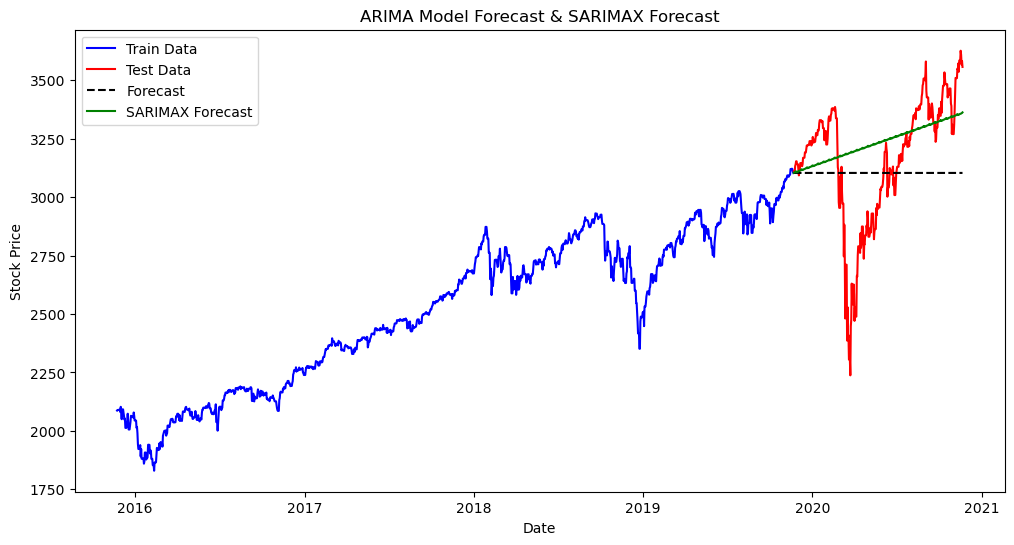

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='red')
plt.plot(forecast, label='Forecast', color='black',linestyle='--')
plt.plot(forecast_sarimax, label='SARIMAX Forecast', color='green')
plt.title('ARIMA Model Forecast & SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()